In [14]:
import numpy as np
import pandas as pd
import os
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                    
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import SimpleRNN
from keras.layers import GRU
import seaborn as sns
import tensorflow as tf

%matplotlib inline

In [15]:
df = pd.read_csv('births.csv')

In [16]:
df.head()

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    365 non-null    object
 1   Births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [18]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")
df.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


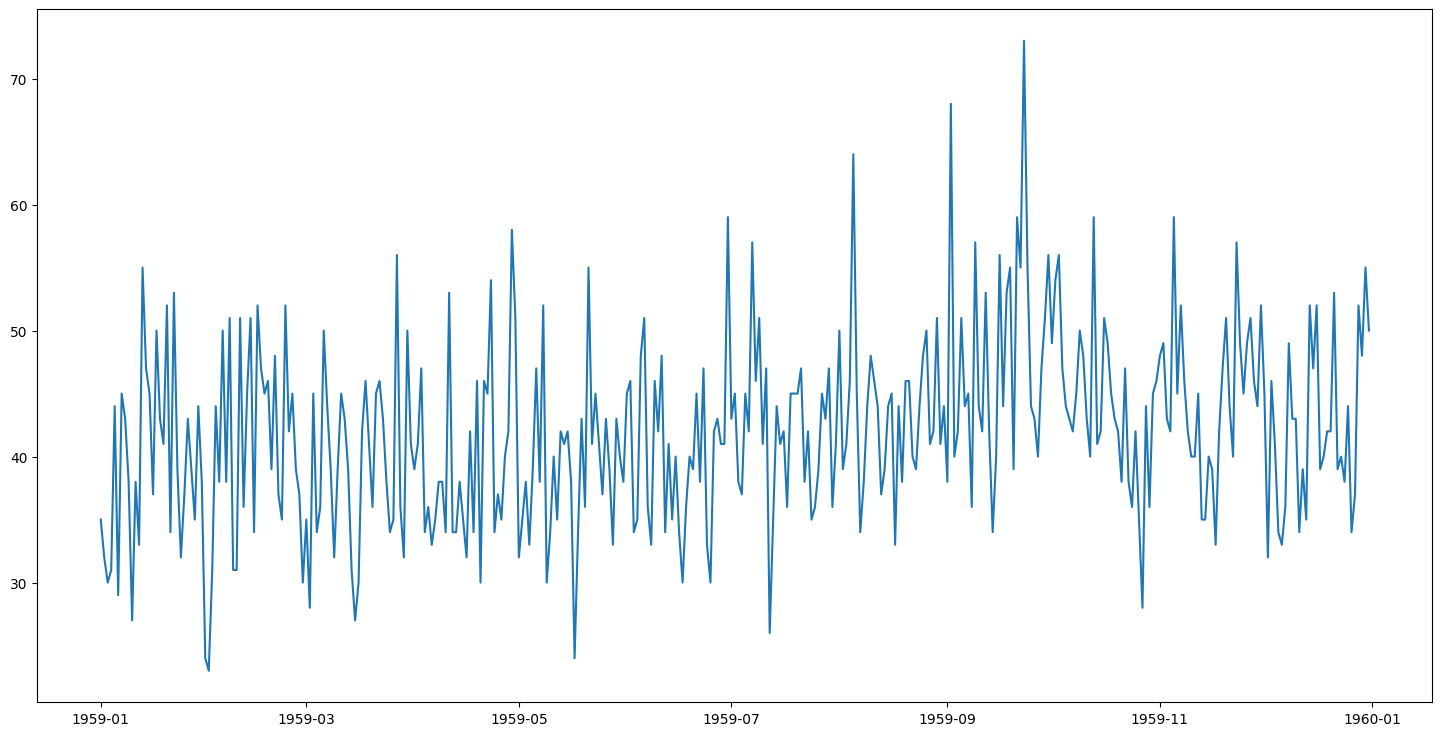

In [19]:
plt.figure(figsize=(18,9))
plt.plot(df.index, df["Births"], linestyle="-")
plt.xlabel=('Date')
plt.ylabel=('Births')
plt.show();

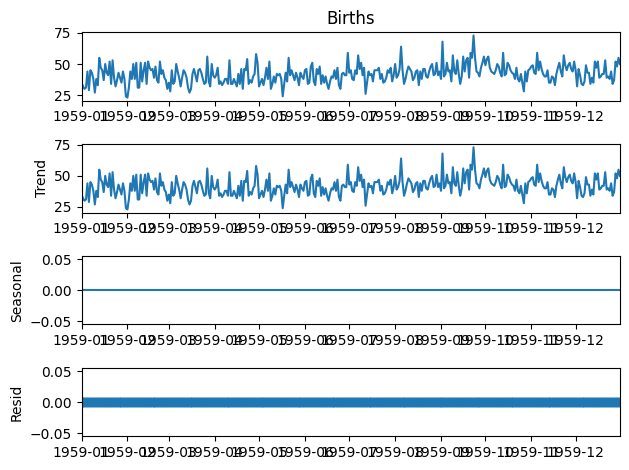

In [20]:
a = seasonal_decompose(df["Births"], model = "add", period=1)
a.plot();

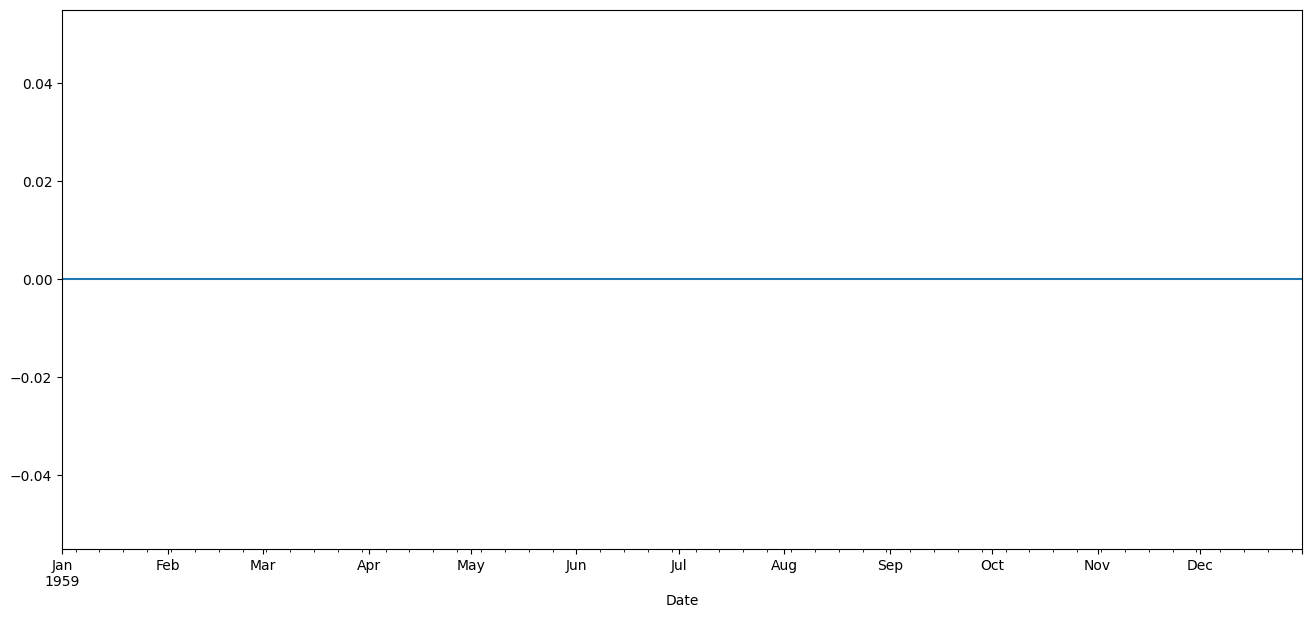

In [21]:
plt.figure(figsize = (16,7))
a.seasonal.plot();

In [22]:
adf_test = adfuller(df["Births"])
print('p-value = ' + str(adf_test[1]))

if adf_test[1] > 0.05:
    print('it is not a stationary process')
else:
    print('it is a stationary process')

p-value = 5.2434129901498554e-05
it is a stationary process


In [23]:
test_data_size = 12
train_data = df[:len(df)-test_data_size].copy()
print(train_data)
test_data = df[len(df)-test_data_size:].copy()

            Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44
...            ...
1959-12-15      47
1959-12-16      52
1959-12-17      39
1959-12-18      40
1959-12-19      42

[353 rows x 1 columns]


In [24]:
#arima_model = ARIMA(train_data['Births'],order=(1,1,1))

arima_model = SARIMAX(train_data['Births'],
               order=(1, 0, 1),
               seasonal_order=(7, 1, 2, 12))


arima_result = arima_model.fit()
arima_result.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.40901D+00    |proj g|=  4.47951D-02

At iterate    5    f=  3.32023D+00    |proj g|=  1.74404D-02

At iterate   10    f=  3.31420D+00    |proj g|=  2.78107D-02

At iterate   15    f=  3.31082D+00    |proj g|=  3.49422D-03

At iterate   20    f=  3.30728D+00    |proj g|=  1.58379D-02

At iterate   25    f=  3.30456D+00    |proj g|=  4.27453D-03

At iterate   30    f=  3.30355D+00    |proj g|=  2.64962D-03

At iterate   35    f=  3.30351D+00    |proj g|=  7.32098D-04

At iterate   40    f=  3.30351D+00    |proj g|=  1.15419D-04

At iterate   45    f=  3.30350D+00    |proj g|=  1.31444D-04

At iterate   50    f=  3.30350D+00    |proj g|=  3.22019D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                  Births   No. Observations:                  353
Model:             SARIMAX(1, 0, 1)x(7, 1, [1, 2], 12)   Log Likelihood               -1166.136
Date:                                 Wed, 17 May 2023   AIC                           2356.273
Time:                                         04:00:29   BIC                           2402.256
Sample:                                     01-01-1959   HQIC                          2374.593
                                          - 12-19-1959                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9912      0.018     55.020      0.000       0.956       1.027
ma.L1         -0.9292      0.030    -30.563      0.000      -0.989      -0.870
ar.S.L12      -1.0920      0.529     -2.066      0.039      -2.128      -0.056
ar.S.L24      -0.1375      0.156     -0.882      0.378      -0.443       0.168
ar.S.L36       0.0322      0.141      0.229      0.819      -0.244       0.308
ar.S.L48       0.0345      0.125      0.275      0.783      -0.211       0.280
ar.S.L60       0.0492      0.125      0.392      0.695      -0.197       0.295
ar.S.L72       0.0781      0.133      0.586      0.558      -0.183       0.339
ar.S.L84       0.0195      0.097      0.201      0.841      -0.170       0.209
ma.S.L12      -0.0438      4.768     -0.009      0.993      -9.389       9.302
ma.S.L24      -0.9547      4.827     -0.198      0.843     -10.416       8.506
sigma2        48.6426    235.218      0.207      0.836    -412.376     509.661
===================================================================================
Ljung-Box (L1) (Q):                   2.21   Jarque-Bera (JB):                13.91
Prob(Q):                              0.14   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                             0.26
Prob(H) (two-sided):                  0.77   Kurtosis:                         3.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred.index = test_data.index
arima_pred

Date
1959-12-20    40.956998
1959-12-21    41.663787
1959-12-22    42.428683
1959-12-23    42.634753
1959-12-24    44.838435
1959-12-25    42.193933
1959-12-26    40.735774
1959-12-27    42.471248
1959-12-28    40.956483
1959-12-29    42.368722
1959-12-30    40.396468
1959-12-31    44.733041
Name: ARIMA Predictions, dtype: float64

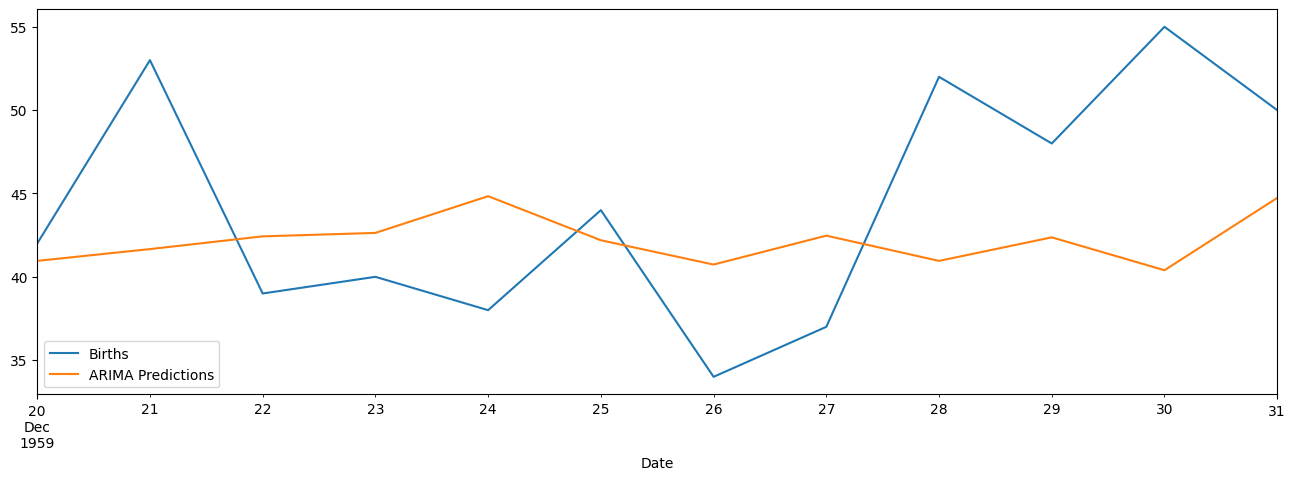

In [26]:
test_data['Births'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [27]:
arima_rmse_error = rmse(test_data['Births'], arima_pred)
arima_mse_error = arima_rmse_error**2
arima_mae_error = mean_absolute_error(test_data['Births'], arima_pred)
mean_value = df['Births'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 55.69176680081915
RMSE Error: 7.462691659235236
Mean: 41.98082191780822


In [28]:
global_test_data = test_data.copy()
global_test_data['ARIMA_Predictions'] = arima_pred

In [29]:
scaler = MinMaxScaler()

scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [30]:
n_input = 12
n_features= 1

val_size = 60
train_size = scaled_train_data.shape[0]

scaled_train_data_copy = scaled_train_data[:train_size - val_size].copy()
scaled_val_data_copy = scaled_train_data[train_size - val_size:].copy()

generator = TimeseriesGenerator(scaled_train_data_copy, scaled_train_data_copy, length=n_input, batch_size=1)
validation_generator = TimeseriesGenerator(scaled_val_data_copy,scaled_val_data_copy,length=n_input, batch_size=1)

In [31]:
from tensorflow.keras import layers, models, Input

#rnn_model = Sequential()
#rnn_model.add(SimpleRNN(100, activation='relu', input_shape=(n_input, n_features)))
#rnn_model.add(Dense(1))

'''
rnn_model = tf.keras.Sequential([
    Input(shape=(n_input, n_features)),
    layers.rnn(100),
    layers.Dense(40, activation='relu'),
    layers.Dense(1)
])

rnn_model.compile(optimizer='adam', loss='mse')

rnn_model.summary()
'''

rnn_model = Sequential()
# model.add(GRU(10, activation='relu', input_shape=(length,1)))
rnn_model.add(GRU(20, activation='relu', return_sequences=True, input_shape=(n_input,1)))
rnn_model.add(GRU(10, activation='relu'))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 12, 20)            1380      
                                                                 
 gru_1 (GRU)                 (None, 10)                960       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 2,351
Trainable params: 2,351
Non-trainable params: 0
_________________________________________________________________


2023-05-17 04:00:30.082985: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-17 04:00:30.111540: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-17 04:00:30.111753: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-17 04:00:30.112180: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [32]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

epochs = 40
early_stop = EarlyStopping(monitor='val_loss',patience=10)
ckpt = ModelCheckpoint('model6.hdf5', save_best_only=True, monitor='val_loss', verbose=1)
rnn_model.fit_generator(
    generator,
    steps_per_epoch=len(generator),
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[early_stop, ckpt])

Epoch 1/40
280/281 [============================>.] - ETA: 0s - loss: 0.0320
Epoch 1: val_loss improved from inf to 0.01741, saving model to model6.hdf5
281/281 [==============================] - 14s 42ms/step - loss: 0.0319 - val_loss: 0.0174
Epoch 2/40
281/281 [==============================] - ETA: 0s - loss: 0.0217
Epoch 2: val_loss improved from 0.01741 to 0.01575, saving model to model6.hdf5
281/281 [==============================] - 12s 43ms/step - loss: 0.0217 - val_loss: 0.0157
Epoch 3/40
281/281 [==============================] - ETA: 0s - loss: 0.0214
Epoch 3: val_loss did not improve from 0.01575
281/281 [==============================] - 12s 41ms/step - loss: 0.0214 - val_loss: 0.0172
Epoch 4/40
280/281 [============================>.] - ETA: 0s - loss: 0.0214
Epoch 4: val_loss did not improve from 0.01575
281/281 [==============================] - 12s 41ms/step - loss: 0.0213 - val_loss: 0.0165
Epoch 5/40
281/281 [==============================] - ETA: 0s - loss: 0.0214
E

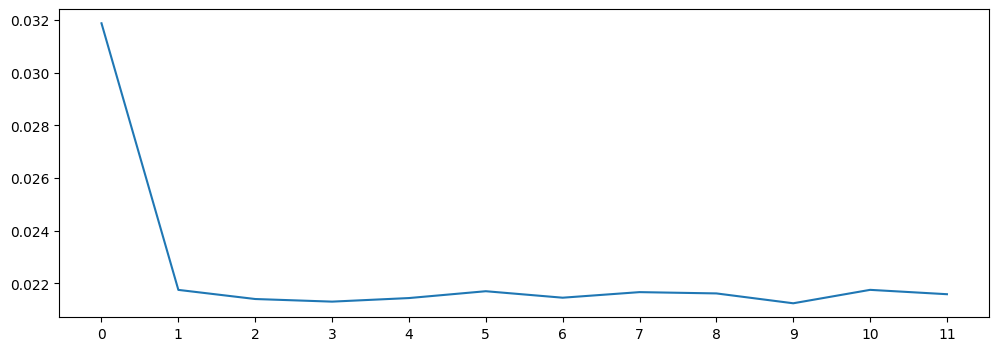

In [33]:
losses_rnn = rnn_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_rnn)),losses_rnn);

In [34]:
RNN_Predictions_scaled = list()

# last n_input elements
batch = scaled_train_data[-n_input:]
print('batch')
print(batch)
print('shape is ', batch.shape)
# shape now is (1, 12, 1)
current_batch = batch.reshape((1, n_input, n_features))
print('current batch')
print(current_batch)
print('shape is ', current_batch.shape)
for i in range(len(test_data)):   
    rnn_pred = rnn_model.predict(current_batch)[0]
    RNN_Predictions_scaled.append(rnn_pred) 
    # first element in current_batch will be gone
    # a new element will be inserted at the end
    current_batch = np.append(current_batch[:,1:,:],[[rnn_pred]],axis=1)
    print('current_batch now\n', current_batch)
    print('current_batch shape\n', current_batch.shape)

batch
[[0.52]
 [0.4 ]
 [0.4 ]
 [0.22]
 [0.32]
 [0.24]
 [0.58]
 [0.48]
 [0.58]
 [0.32]
 [0.34]
 [0.38]]
shape is  (12, 1)
current batch
[[[0.52]
  [0.4 ]
  [0.4 ]
  [0.22]
  [0.32]
  [0.24]
  [0.58]
  [0.48]
  [0.58]
  [0.32]
  [0.34]
  [0.38]]]
shape is  (1, 12, 1)
1/1 [==============================] - 0s 227ms/step
current_batch now
 [[[0.4       ]
  [0.4       ]
  [0.22      ]
  [0.32      ]
  [0.24      ]
  [0.58      ]
  [0.48      ]
  [0.58      ]
  [0.32      ]
  [0.34      ]
  [0.38      ]
  [0.40106559]]]
current_batch shape
 (1, 12, 1)
1/1 [==============================] - 0s 20ms/step
current_batch now
 [[[0.4       ]
  [0.22      ]
  [0.32      ]
  [0.24      ]
  [0.58      ]
  [0.48      ]
  [0.58      ]
  [0.32      ]
  [0.34      ]
  [0.38      ]
  [0.40106559]
  [0.39993912]]]
current_batch shape
 (1, 12, 1)
1/1 [==============================] - 0s 22ms/step
current_batch now
 [[[0.22      ]
  [0.32      ]
  [0.24      ]
  [0.58      ]
  [0.48      ]
  [0.58      ]
  

In [35]:
RNN_Predictions_scaled

[array([0.4010656], dtype=float32),
 array([0.39993912], dtype=float32),
 array([0.39961255], dtype=float32),
 array([0.3995303], dtype=float32),
 array([0.40006524], dtype=float32),
 array([0.40023404], dtype=float32),
 array([0.4005872], dtype=float32),
 array([0.39966434], dtype=float32),
 array([0.39931244], dtype=float32),
 array([0.3988176], dtype=float32),
 array([0.3993215], dtype=float32),
 array([0.39962262], dtype=float32)]

In [36]:
RNN_Predictions = scaler.inverse_transform(RNN_Predictions_scaled)

In [37]:
global_test_data['RNN_Predictions'] = RNN_Predictions

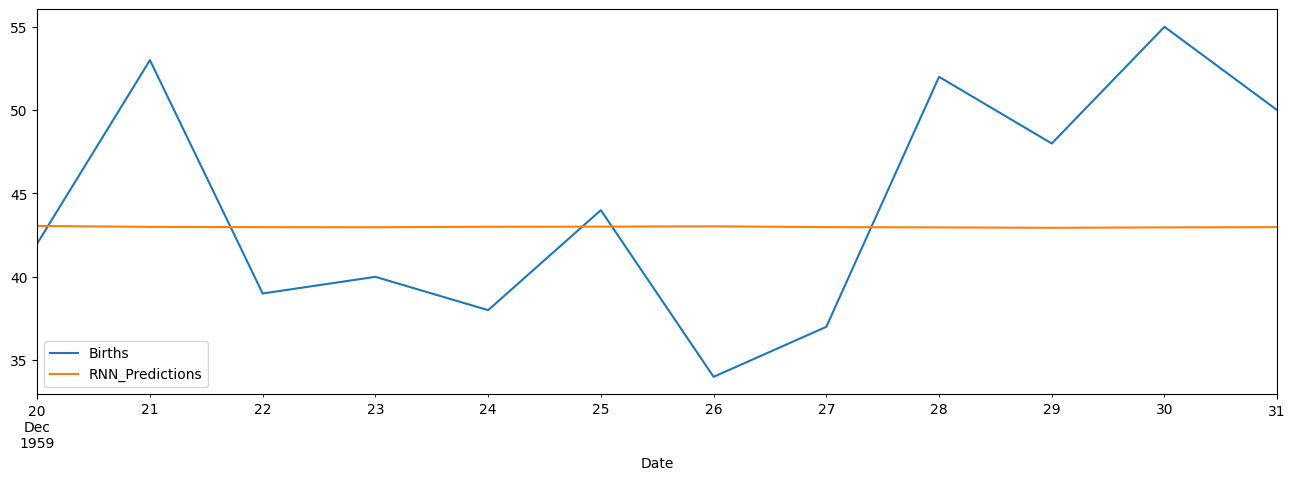

In [38]:
global_test_data['Births'].plot(figsize = (16,5), legend=True)
global_test_data['RNN_Predictions'].plot(legend = True);

In [39]:
rnn_rmse_error = rmse(global_test_data['Births'], global_test_data["RNN_Predictions"])
rnn_mse_error = rnn_rmse_error**2
rnn_mae_error = mean_absolute_error(global_test_data['Births'], global_test_data["RNN_Predictions"])
mean_value = df['Births'].mean()

print(f'MSE Error: {rnn_mse_error}\nRMSE Error: {rnn_rmse_error}\nMean: {mean_value}')

MSE Error: 47.54228975933569
RMSE Error: 6.895091715077885
Mean: 41.98082191780822


In [40]:
rmse_errors = [arima_rmse_error, rnn_rmse_error]
mse_errors = [arima_mse_error, rnn_mse_error]
mae_errors = [arima_mae_error, rnn_mae_error]

In [41]:
errors = pd.DataFrame({"Models" : ["ARIMA", "RNN"],"RMSE Error" : rmse_errors, "MSE Error" : mse_errors,"MAE Error": mae_errors})

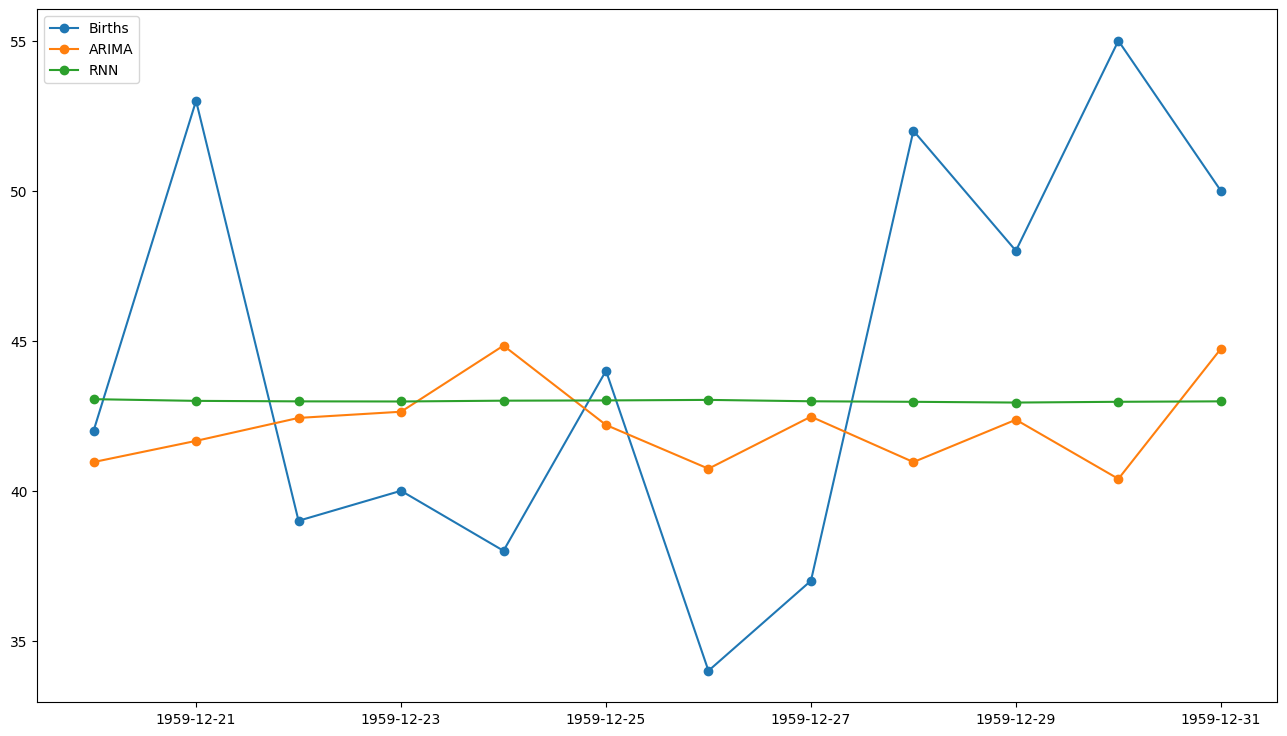

In [42]:
plt.figure(figsize=(16,9))
plt.plot_date(global_test_data.index, global_test_data["Births"], linestyle="-")
plt.plot_date(global_test_data.index, global_test_data["ARIMA_Predictions"], linestyle="-")
plt.plot_date(global_test_data.index, global_test_data["RNN_Predictions"], linestyle="-")
plt.legend(["Births", "ARIMA", 'RNN'], loc ="upper left")
plt.show()

In [43]:
print(f"Mean: {global_test_data['Births'].mean()}")
errors

Mean: 44.333333333333336


,Models,RMSE Error,MSE Error,MAE Error
0,ARIMA,7.462692,55.691767,6.319955
1,RNN,6.895092,47.542290,6.013658


In [44]:
global_test_data

,Births,ARIMA_Predictions,RNN_Predictions
Date,,,
1959-12-20,42,40.956998,43.053279
1959-12-21,53,41.663787,42.996956
1959-12-22,39,42.428683,42.980627
1959-12-23,40,42.634753,42.976515
1959-12-24,38,44.838435,43.003262
1959-12-25,44,42.193933,43.011702
1959-12-26,34,40.735774,43.029360
1959-12-27,37,42.471248,42.983217
1959-12-28,52,40.956483,42.965622
